# TS4

## TOOLBOX

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

fs = 1000
N = 1000

def mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = N, fss = fs):
    t = nn/fss
    #tt = np.arange(0,t,1/fss)
    tt = np.linspace(0, t, nn, endpoint=False)
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc

    return tt, xx

def cuantizar(Sr, Vf, B):
    q = Vf/(2**(B-1))
    Srq = (Sr*1/q)
    Sq = np.round(Srq)*q
    
    return Sq, q


## Calculos

In [10]:
def graficar_analisis(B, kn):
    ts = 1/fs
    df = fs/N
    f0 = fs/N
    Vmax = np.sqrt(2)
    bins = 10
     
    # Datos del ADC
    B = B           #bits
    Vf = 2          #Volts
    q = Vf/2**(B-1) #Volts
    
    #ruido digital teorico
    pot_ruido = ((q**2)/12) * kn
    
    #ruido analogico
    #Snr = Snr     #dB
    #Ps = 1      #Potencia señal
    #Pn = Ps/(10**(Snr/10))
    
    tt, s = mi_funcion_sen(vmax=Vmax, ff=f0)
    n = random.normal(0, np.sqrt(pot_ruido), N)
    sr = s + n                      #señal con ruido
    srq, _ = cuantizar(sr, Vf, B)   #señal cuantizada
    nq = srq - sr                   #error de cuantizacion
    
    #realizacion de la fft
    ff = np.arange(0, N, df)
    bfrec = ff<=fs/2
    
    ft_S = np.fft.fft(s)/N
    ft_Sr = np.fft.fft(sr)/N
    ft_Srq = np.fft.fft(srq)/N
    ft_Nn = np.fft.fft(n)/N
    ft_Nq = np.fft.fft(nq)/N
    
    nNn_mean = np.mean(np.abs(ft_Nn)**2)
    nNq_mean = np.mean(np.abs(ft_Nq)**2)
    # %%
    
    plt.figure(1, figsize=(12,6))
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V y q = {:3.5f} V'.format(B, Vf, q))
    
    plt.plot(tt, s, "blue", zorder=3 )
    plt.plot(tt, sr, "purple", zorder=2)
    plt.plot(tt, srq, "red", zorder=1, alpha=0.9)
    plt.legend(["original S", "con ruido", "cuantizada"])
    
    plt.tight_layout()
    plt.show()
    
    #--------------#
    plt.figure(2, figsize=(12,6))
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V y q = {:3.5f} V'.format(B, Vf, q))
    
    plt.plot(ff[bfrec], 10*np.log10(2*np.abs(ft_Sr[bfrec])**2))
    plt.plot(ff[bfrec], 10*np.log10(2*np.abs(ft_Srq[bfrec])**2))
    plt.plot(ff[bfrec], 10*np.log10(2*np.abs(ft_Nn[bfrec])**2), "g", alpha=0.7)
    plt.plot(ff[bfrec], 10*np.log10(2*np.abs(ft_Nq[bfrec])**2), "c", alpha=0.7)
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--g', zorder=6)
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNq_mean, nNq_mean]) ), '--c', zorder=5)
    
    plt.legend(["$ Sr $",
                "$ Srq $",
                "$ n $",
                "$ nq $",
                '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)),
                '$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* nNq_mean))])
    
    plt.tight_layout()
    plt.show()
    
    #-------------#
    plt.figure(figsize=(12,6))
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V y q = {:3.5f} V'.format(B, Vf, q))
    
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.hist( nq )
    
    plt.show()
    plt.tight_layout()

## Visualizacion

### Snr = 1/10, 1, 10 con B = 4 bits

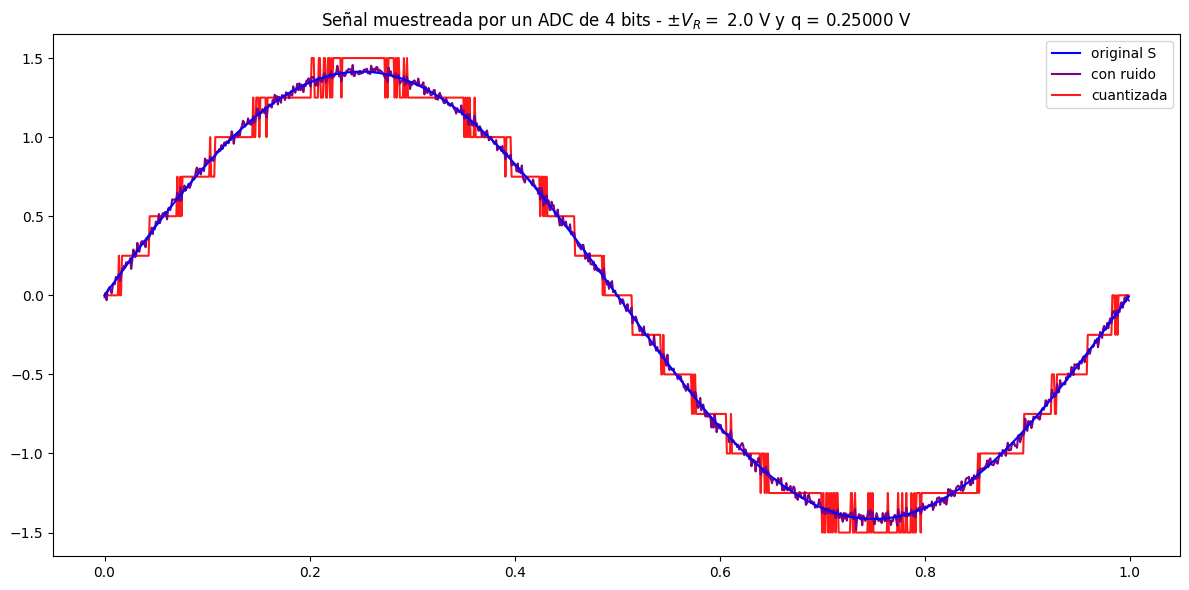

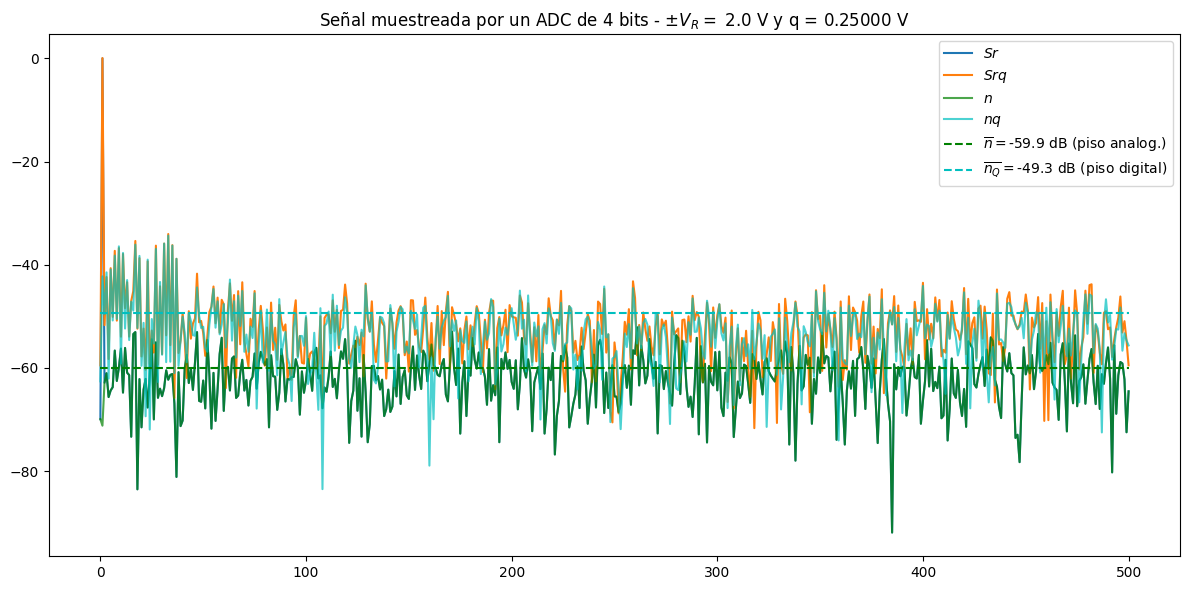

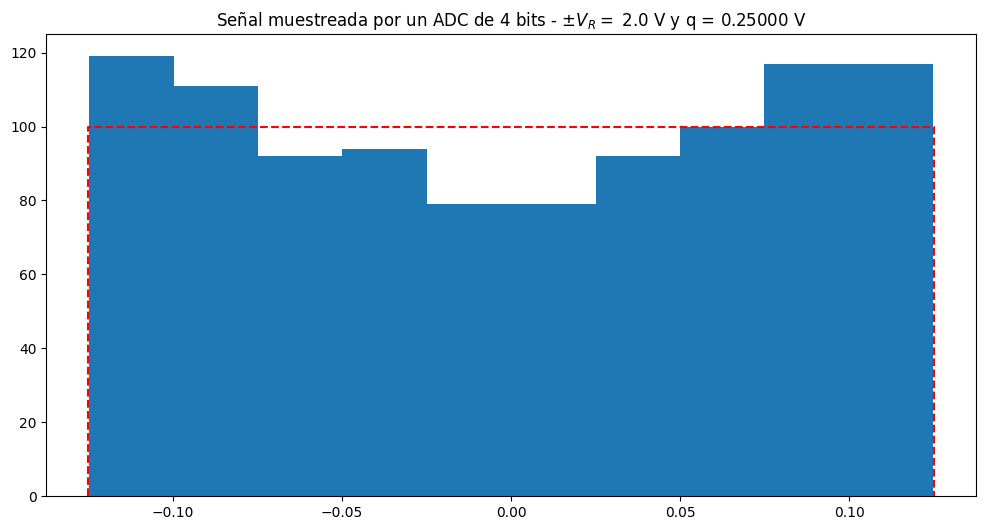

<Figure size 640x480 with 0 Axes>

In [18]:
graficar_analisis(4, 1/10)

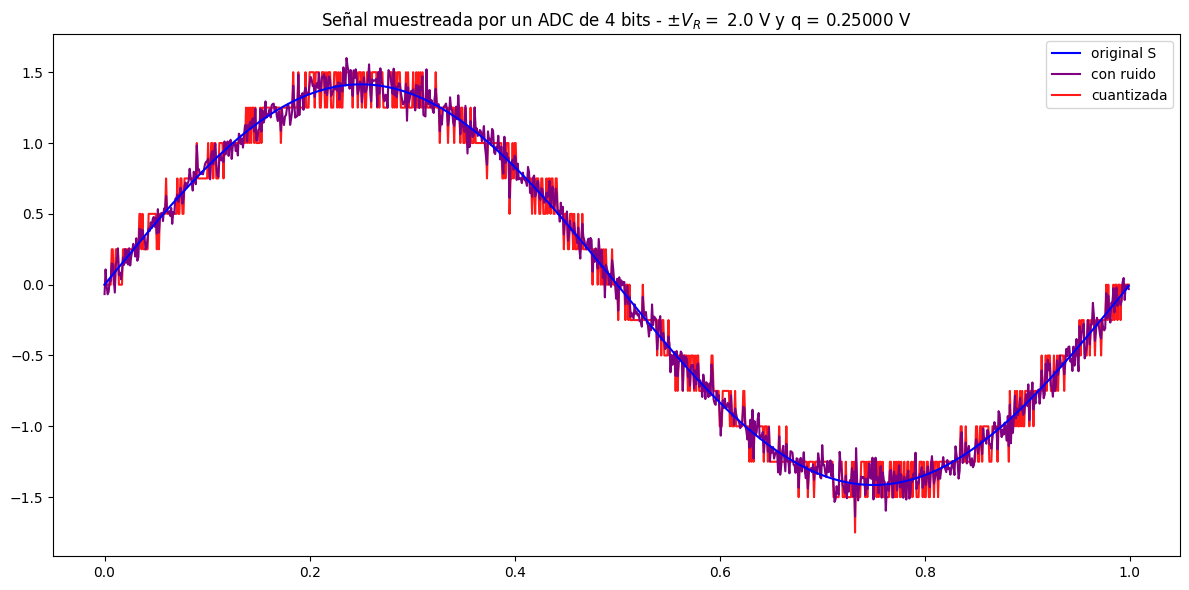

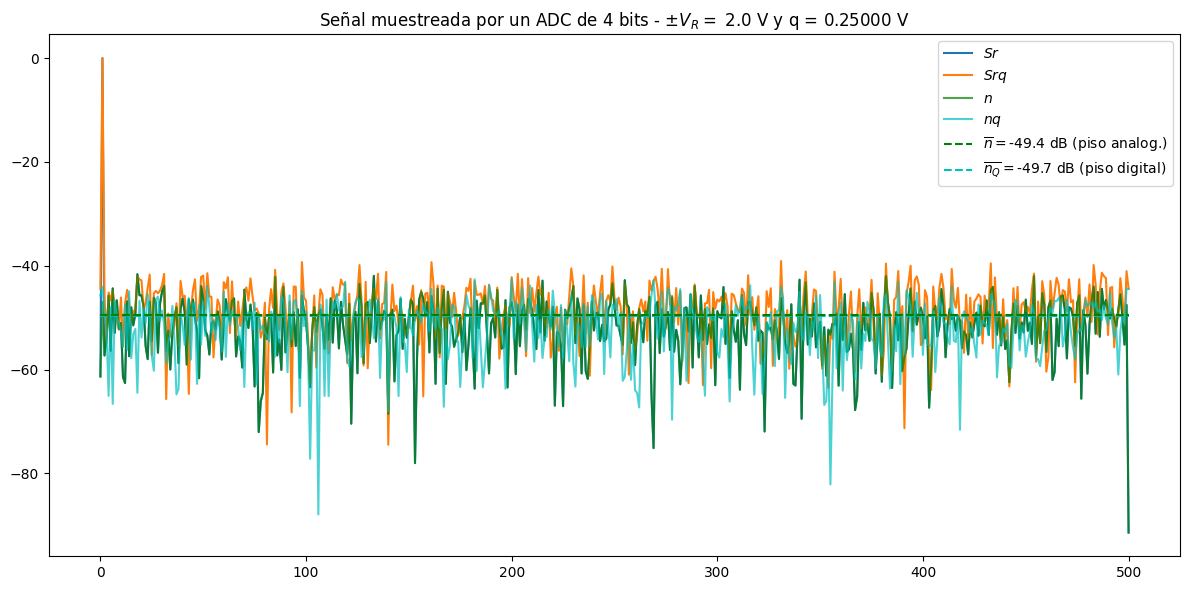

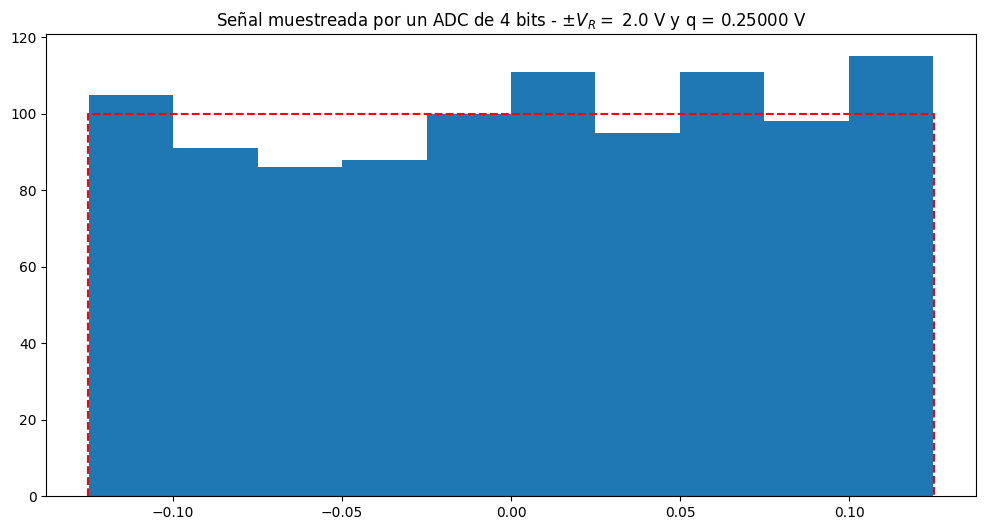

<Figure size 640x480 with 0 Axes>

In [19]:
graficar_analisis(4, 1)

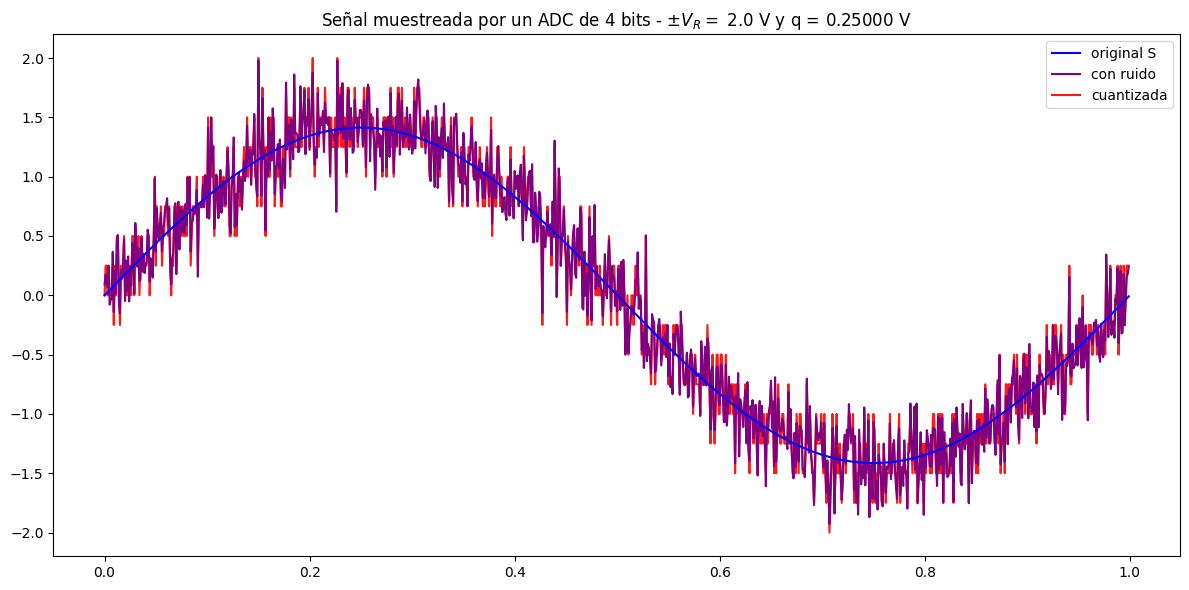

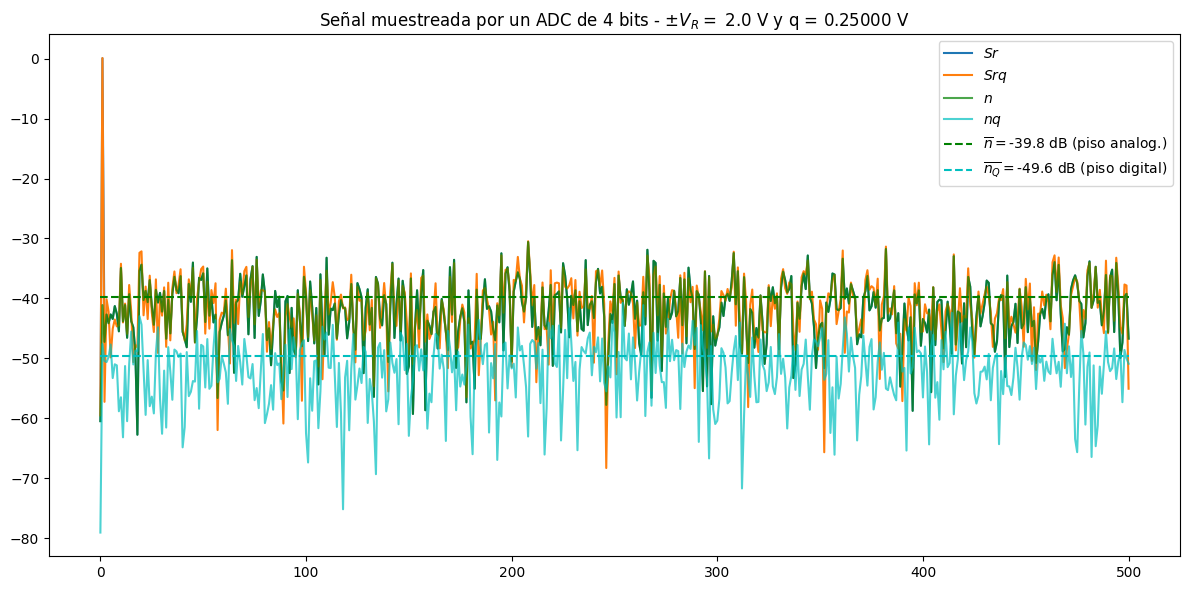

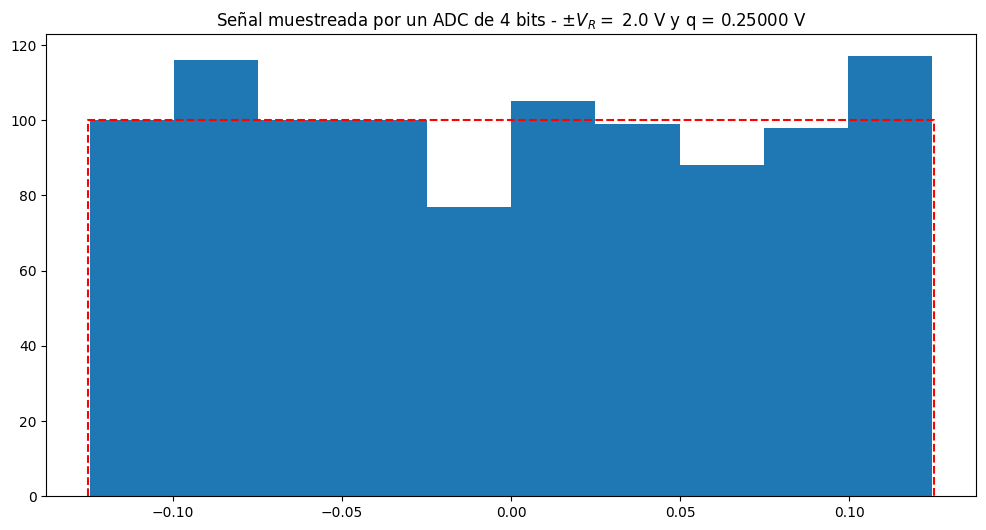

<Figure size 640x480 with 0 Axes>

In [20]:
graficar_analisis(4, 10)

### B = 8, 16 bits con Snr 10

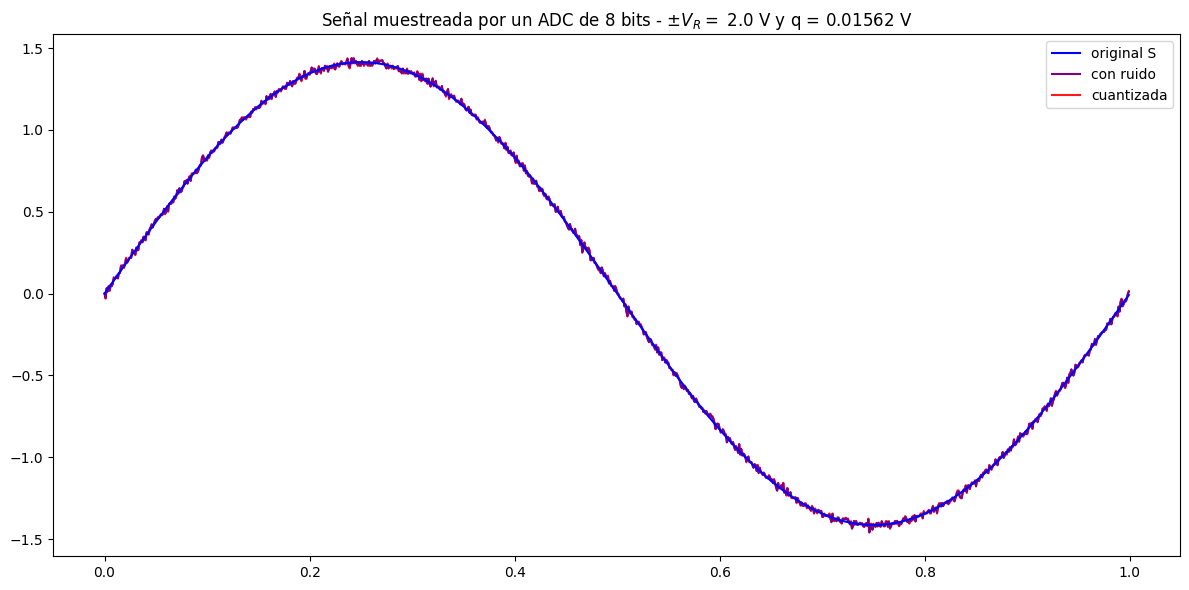

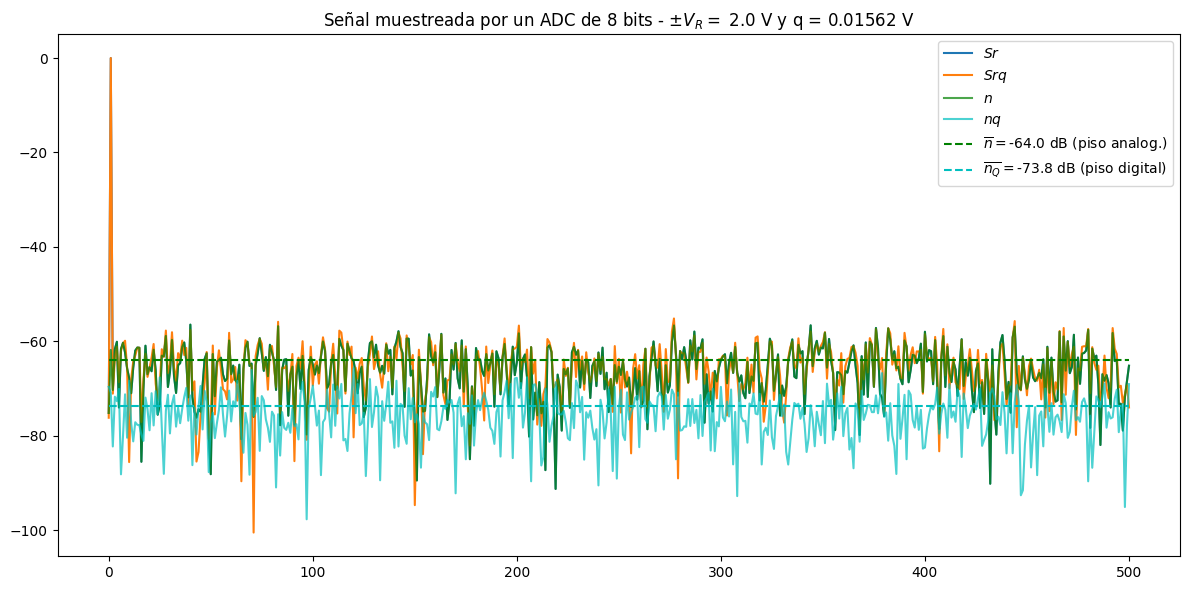

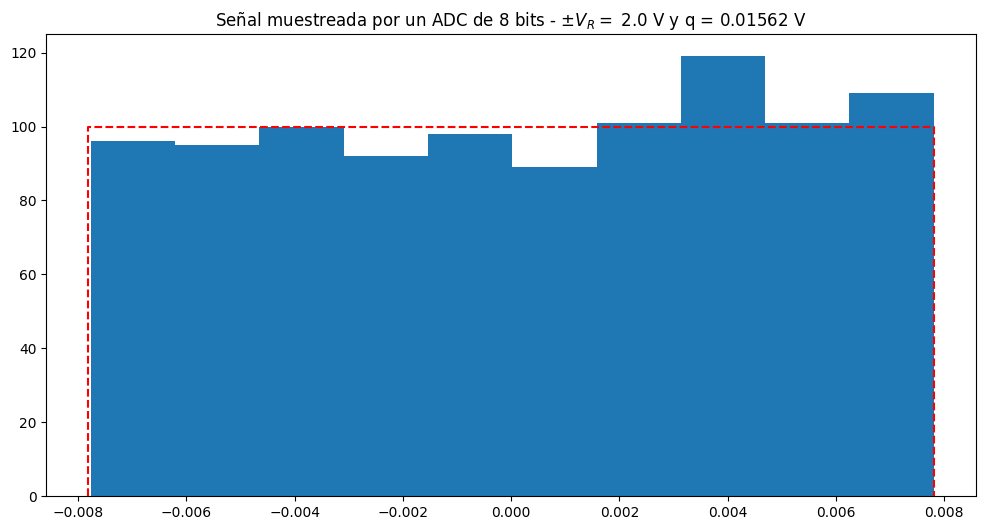

<Figure size 640x480 with 0 Axes>

In [21]:
graficar_analisis(8, 10)

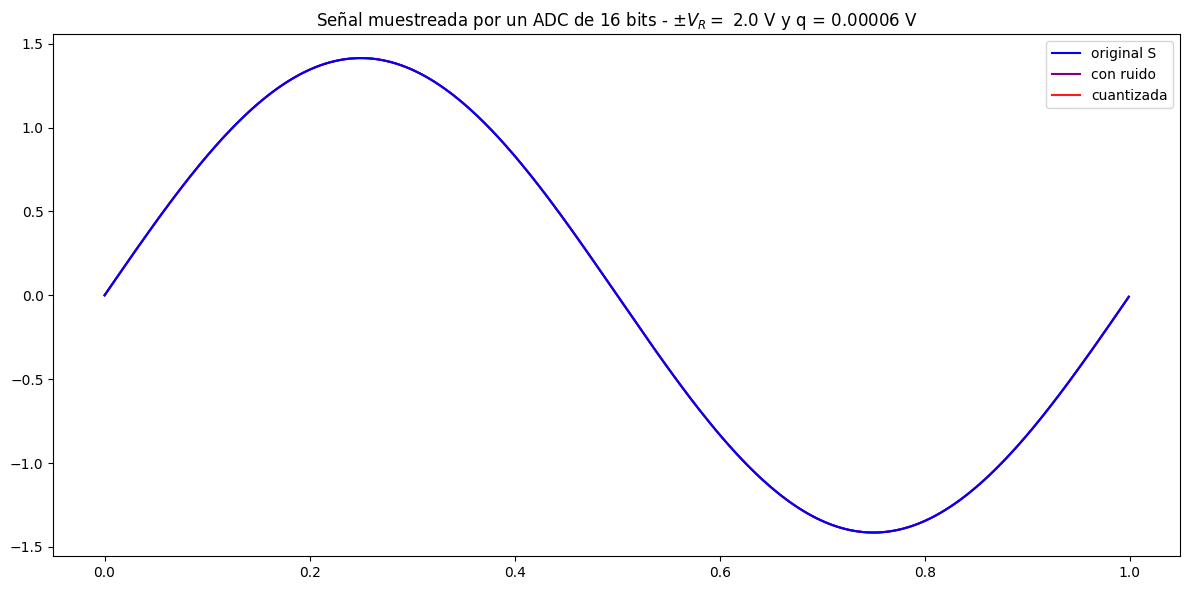

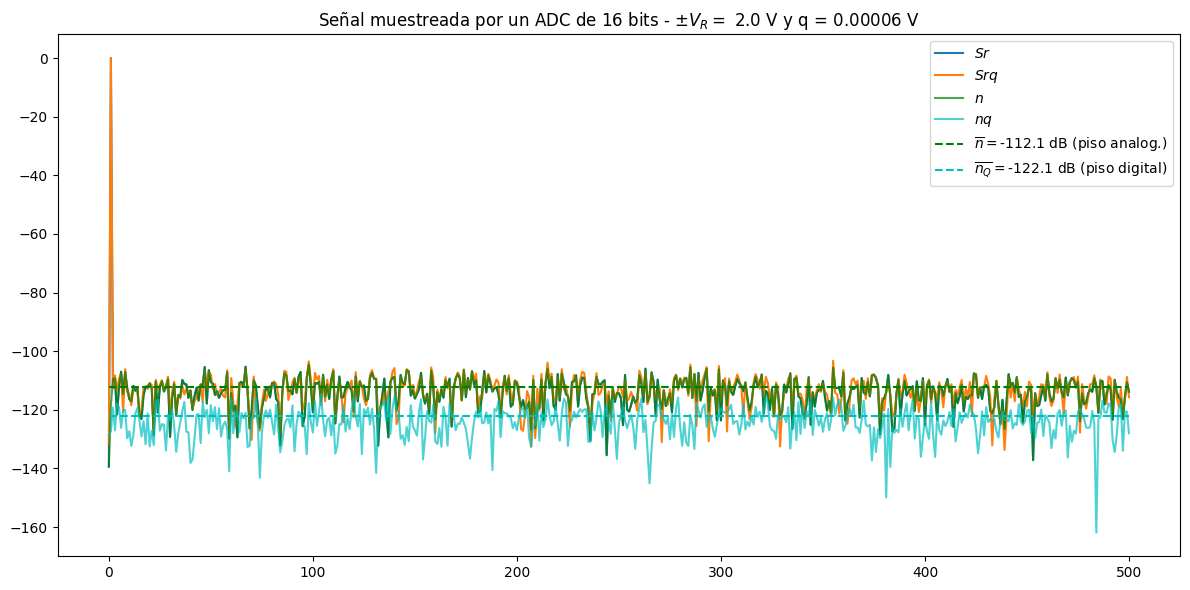

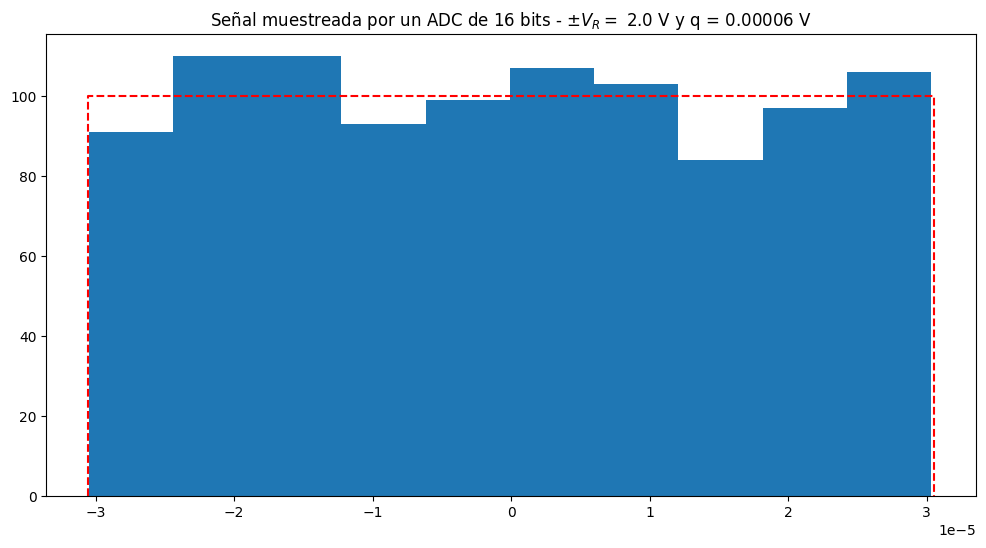

<Figure size 640x480 with 0 Axes>

In [22]:
graficar_analisis(16, 10)

## Analisis

Se puede observar en la Visualizacion el piso de ruido tanto analogico como el piso de ruido digital que depente cada uno de distintos factores, por ejemplo el piso de ruido analogico depende tanto de la potencia de la señal que en nuestro caso la usamos de 1W y del SNR que lo vamos variando dependiendo de lo que queremos analizar, entonces observando los graficos observamos que para los distintos valores de SNR (1/10, 1, 10) el piso de ruido analogico va bajando a medida que vamos aumentando el SNR, lo cual es bueno ya que podemos llegar a analizar señales de mas pequeñas.

Entonces viendo el piso de ruido digital podemos observar que de lo mismo que el piso de ruido digital, pero en este caso depende de la resolucion del ADC, es decir de los bits, que a medida que vamos aumentando la resolucion de los bits el piso de ruido digital bajando lo cual nos da mayor opcion para analizar nuestras señales.


## Conclusion

Entonces viendo los resultados en los graficos que se mostraron podemos decir que llegamos a obtener los resultados teoricos que se discutieron en clase, es decir que por ejemplo para el caso del piso de ruido analogico este baja a medida que aumentamos el SNR, esto implica que para poder mejorar fisicamente los elementos de nuestro circuito es decir inductores, capacitores, etc. Claro estos teniendo un bajo ruido. En el caso del piso de ruido digital depende de la cantidad de bits y de la tension de referencia Vref, entonces si quisiera mejorar el piso de ruido digital podriamos incrementar el numero de bits del adc o bajar la tension de referencia, en los graficos podemos observar que si funciona, a medida que subimos los bits del adc el piso de ruido baja, por lo tanto podemos decir que pudimos llegar a la conclusion teorica que tuvimos.


Resumiendo aumentamos la SNR el piso de ruido analogico baja lo que nos permite obtener señales debiles, y caso contrario a bajar la SNR nuestro piso de ruido es muy bajo lo cual implica que no podremos analizar señales debiles en incluso las señales normales podriamos tener mucho ruido.Del mismo modo con el piso de ruido digital, si aumentos el numero de bits de nuestro adc podemos mejorar el piso de ruido digital y poder calcular señales debiles sin tener mucho ruido.


Ahora si por ejemplo llegaramos a tener un piso de ruido digital muy por debajo del piso de ruido analogico seria un desperdicio de bits, es decir que estariamos teniendo mucha resolucion para nuestras señales pero no nos serviria ya que al tener un piso de ruido analogico muy por encima del ruido digital seria un desperdicio y un analisis computacional mucho mayor por algo que capaz y solo es ruido. Del mismo modo sucederia si fuera de manera contraria, es decir que nuestro piso de ruido analogico este muy por debajo de nuestro piso de ruido digital, estariamos teniendo mucho hardware para que al realizar la cuantificacion lo unico que tengamos seria ruido, lo cual es un desperdicio de material. Entonces podriamos decir que para aprovechar ambas cuestiones tanto hardware como sowtfare deberiamos tener un balance, osea tener tanto el piso de ruido analogico como el piso de ruido digital casi iguales, asi aprovechariamos todos los componentes que tengamos.